In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# 크로마키 이미지와 합성할 이미지 불러오기
img1 = cv2.imread('./img/man_chromakey.jpg')
img2 = cv2.imread('./img/street.jpg')

In [3]:
# ROI 선택을 위한 좌표 계산
h1, w1 = img1.shape[:2]
h2, w2 = img2.shape[:2]
x = (w2 - w1) // 2
y = h2 - h1
w = x + w1
h = y + h1

In [6]:
# 크로마 키 배경 이미지에서 크로마 키가 있을 법한 영역을 10픽셀 정도로 지정하기
chromakey = img1[:10, :10, :]
offset = 20

# 크로마 키 영역 HSV로 변경
hsv_chroma = cv2.cvtColor(chromakey, cv2.COLOR_BGR2HSV)
hsv_img = cv2.cvtColor(img1, cv2.COLOR_BGR2HSV)

In [7]:
# 크로마 키 영역의 H 값에서 offset만큼 여유를 두고 범위 지정
# offset 값은 여러 차례 시도 후 결정
chroma_h = hsv_chroma[:, :, 0]
lower = np.array([chroma_h.min()-offset, 100, 100])
upper  = np.array([chroma_h.max()+offset, 255, 255])

In [8]:
# 마스크 생성 및 마스킹 후 합성
mask = cv2.inRange(hsv_img, lower, upper)
mask_inv = cv2.bitwise_not(mask)
roi = img2[y:h, x:w]
fg = cv2.bitwise_and(img1, img1, mask=mask_inv)
bg = cv2.bitwise_and(roi, roi, mask=mask)
img2[y:h, x:w] = fg + bg

In [10]:
img1.shape

(400, 314, 3)

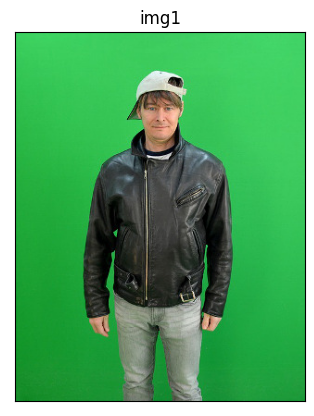

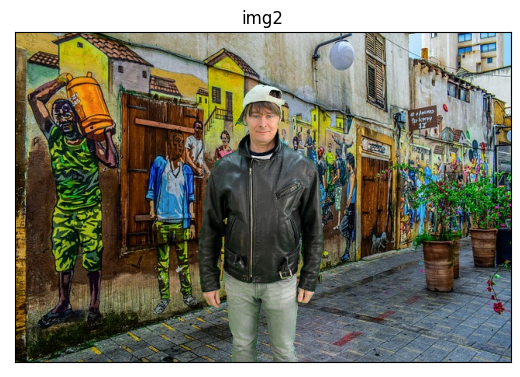

In [16]:
# 결과 출력
plt.title('img1')
plt.imshow(img1[:,:,::-1])
plt.xticks([])
plt.yticks([])
plt.show()

plt.title('img2')
plt.imshow(img2[:,:,::-1])
plt.xticks([])
plt.yticks([])

plt.show()